# Preprocessing

##  Faith Communities Today Survey (FACT) 2010, Jewish

- Loads of fields:
    - Community engagement, like TUTORING
    - Social media
    - outreach to get new members (potentially a good sign)
    - lots more
    
Might be useful to make tutoring field target

In [2]:
FACT_DAT_FP = ''.join([REL_DIR, 'FACT-2010-Jewish.DTA'])
FACT_CB_FP  = ''.join([REL_DIR, 'FACT-2010-Jewish-CB.txt'])

In [3]:
def read_cb(fp):
    """
    Reads codebook .txt file for Faith Communities Today 2010
    Survey of Synagogues, Jewish.
    """
    with open(fp) as f:
        cb_txt = f.read()
    data = re.findall(r'\d+[)][ ]([^\n\r]+)\s+([^\n\r]+)', cb_txt)
    df = (pd.DataFrame(data, columns=['VAR', 'DESCRIPTION'])
          .set_index('VAR')
          )


    return df

In [4]:
fact_cb = read_cb(FACT_CB_FP)

In [5]:
display_cb(fact_cb.iloc[40:])

,DESCRIPTION
VAR,
COMMSERV,Does your congregation have any of the following programs or activities? Community service activities
PARENT,Does your congregation have any of the following programs or activities? Parenting or marriage enrichment activities
YADULT,Does your congregation have any of the following programs or activities? Young adult activities or programs
YOUTHACT,Does your congregation have any of the following programs or activities? Youth [teen] activities or programs
SPORTS,"Does your congregation have any of the following programs or activities? Team sports, fitness activities, exercise classes"
ISRALACT,"Overall, to what extent are your congregation's active participants involved in recruiting new people? Congregation's active participants are involved in recruiting new people [ISRAELACT]"
EVENTS,"During the past 12 months, how often did your congregation hold special events or programs to attract people from the community (such as concerts, fairs, seminars, plays, special meals, etc.)? Held special events or programs to attract people"
NOVISIT,"How are visitors contacted after they attend worship services or other activities? We rarely, if ever, have any visitors"
NOCONTAC,"How are visitors contacted after they attend worship services or other activities? We rarely, if ever, contact our visitors"


In [6]:
display_cb(fact_cb[fact_cb.DESCRIPTION.str.contains('rabbi', case=False)])

,DESCRIPTION
VAR,
LEADAGE,Please describe the principal rabbi of your congregation: Age _____ years old
LEADSEX,Please describe the principal rabbi of your congregation:
EMPLOY,Please describe the principal rabbi of your congregation: Employment status
CALL,Please describe the principal rabbi of your congregation: Permanent or temporary status
CLERGEDU,Please describe the principal rabbi of your congregation: Highest level of education
YEARCALL,Please describe the principal rabbi of your congregation: This person became the principal rabbi of your congregation in what year?
LEADWORS,How much time does your principal rabbi spend in the following areas? Time spent planning and leading worship
LEADVIS,How much time does your principal rabbi spend in the following areas? Time spent developing and promoting a vision and purpose for the congregation
DOEVAN,How much time does your principal rabbi spend in the following areas? Time spent recruiting and training lay leaders


In [7]:
def read_fact_jewish(fp):
    data = (pd.read_stata(fp)
            .rename(columns=lambda x: x.upper()))
    return data
    
fact_df = read_fact_jewish(FACT_DAT_FP)  

In [8]:
def plot_dists(df, ncols=3):
    df = df.select_dtypes(include=['float'])
    nsubs = df.shape[1]
    nrows = -(-nsubs//ncols)  # cieling div
    figsize=(20, nrows*6)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axs = axs.ravel()
    for i, (_, col) in enumerate(df.iteritems()):
        sns.distplot(col.dropna(), ax=axs[i])

# plot_dists(fact_df)

In [9]:
fact_df.loc[fact_df.FULLOTH==fact_df.FULLOTH.max(), 'FULLOTH'] = 0
fact_df.loc[:, 'FULLORD':'PARTOTH'].describe()

,FULLORD,PARTORD,FULLCANT,PARTCANT,FULLADM,PARTADM,FULLPROG,PARTPROG,FULLEDU,PARTEDU,FULLSEC,PARTSEC,FULLCUST,PARTCUST,FULLOTH,PARTOTH
count,1214.000,1214.000,1215.000,1215.000,1215.000,1215.000,1215.000,1215.000,1213.000,1214.000,1215.000,1215.000,1215.000,1215.000,1215.000,1215.000
mean,1.150,0.183,0.437,0.159,1.034,0.152,0.444,0.622,5.170,7.800,2.113,0.680,1.781,0.867,0.970,1.491
std,0.990,0.526,0.551,0.392,3.209,0.636,1.888,1.891,15.964,15.242,3.164,1.064,3.208,1.570,6.536,7.079
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,2.000,10.000,3.000,1.000,2.000,1.000,0.000,0.000
max,11.000,9.000,3.000,3.000,100.000,15.000,49.000,25.000,202.000,215.000,35.000,10.000,50.000,25.000,150.000,100.000


In [10]:
fact_df['Total_Staff'] = fact_df.loc[:, 'FULLORD':'PARTOTH'].sum(axis=1)

In [11]:
fact_df.BUDGET.describe()

count       997.000
mean    1290846.934
std     1443107.193
min         250.000
25%      300000.000
50%      800000.000
75%     1800000.000
max     9500000.000
Name: BUDGET, dtype: float64

In [12]:
data = fact_df.loc[fact_df.Total_Staff>0, ['BUDGET', 'Total_Staff']].dropna()

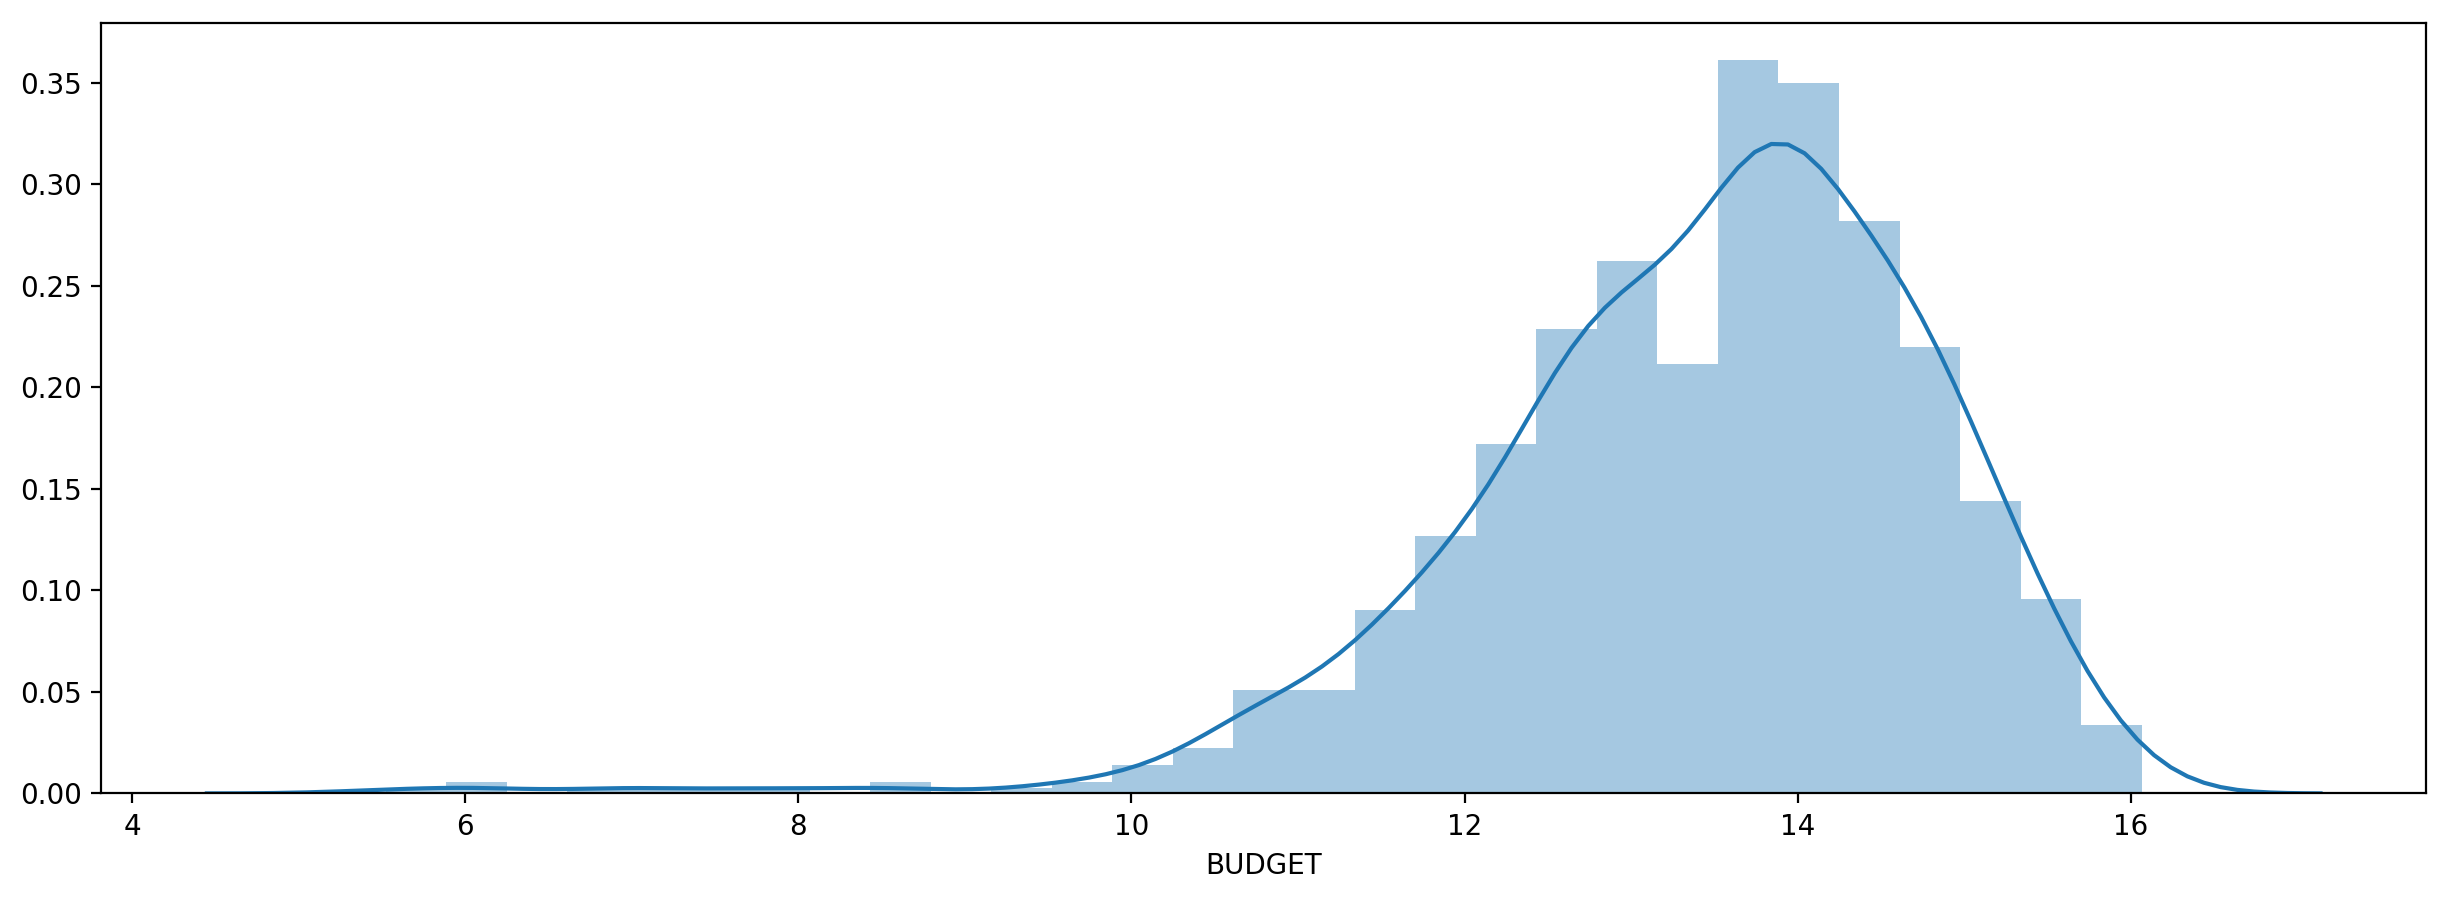

In [13]:
sns.distplot(np.log(data.BUDGET))

<module 'matplotlib.pyplot' from '/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

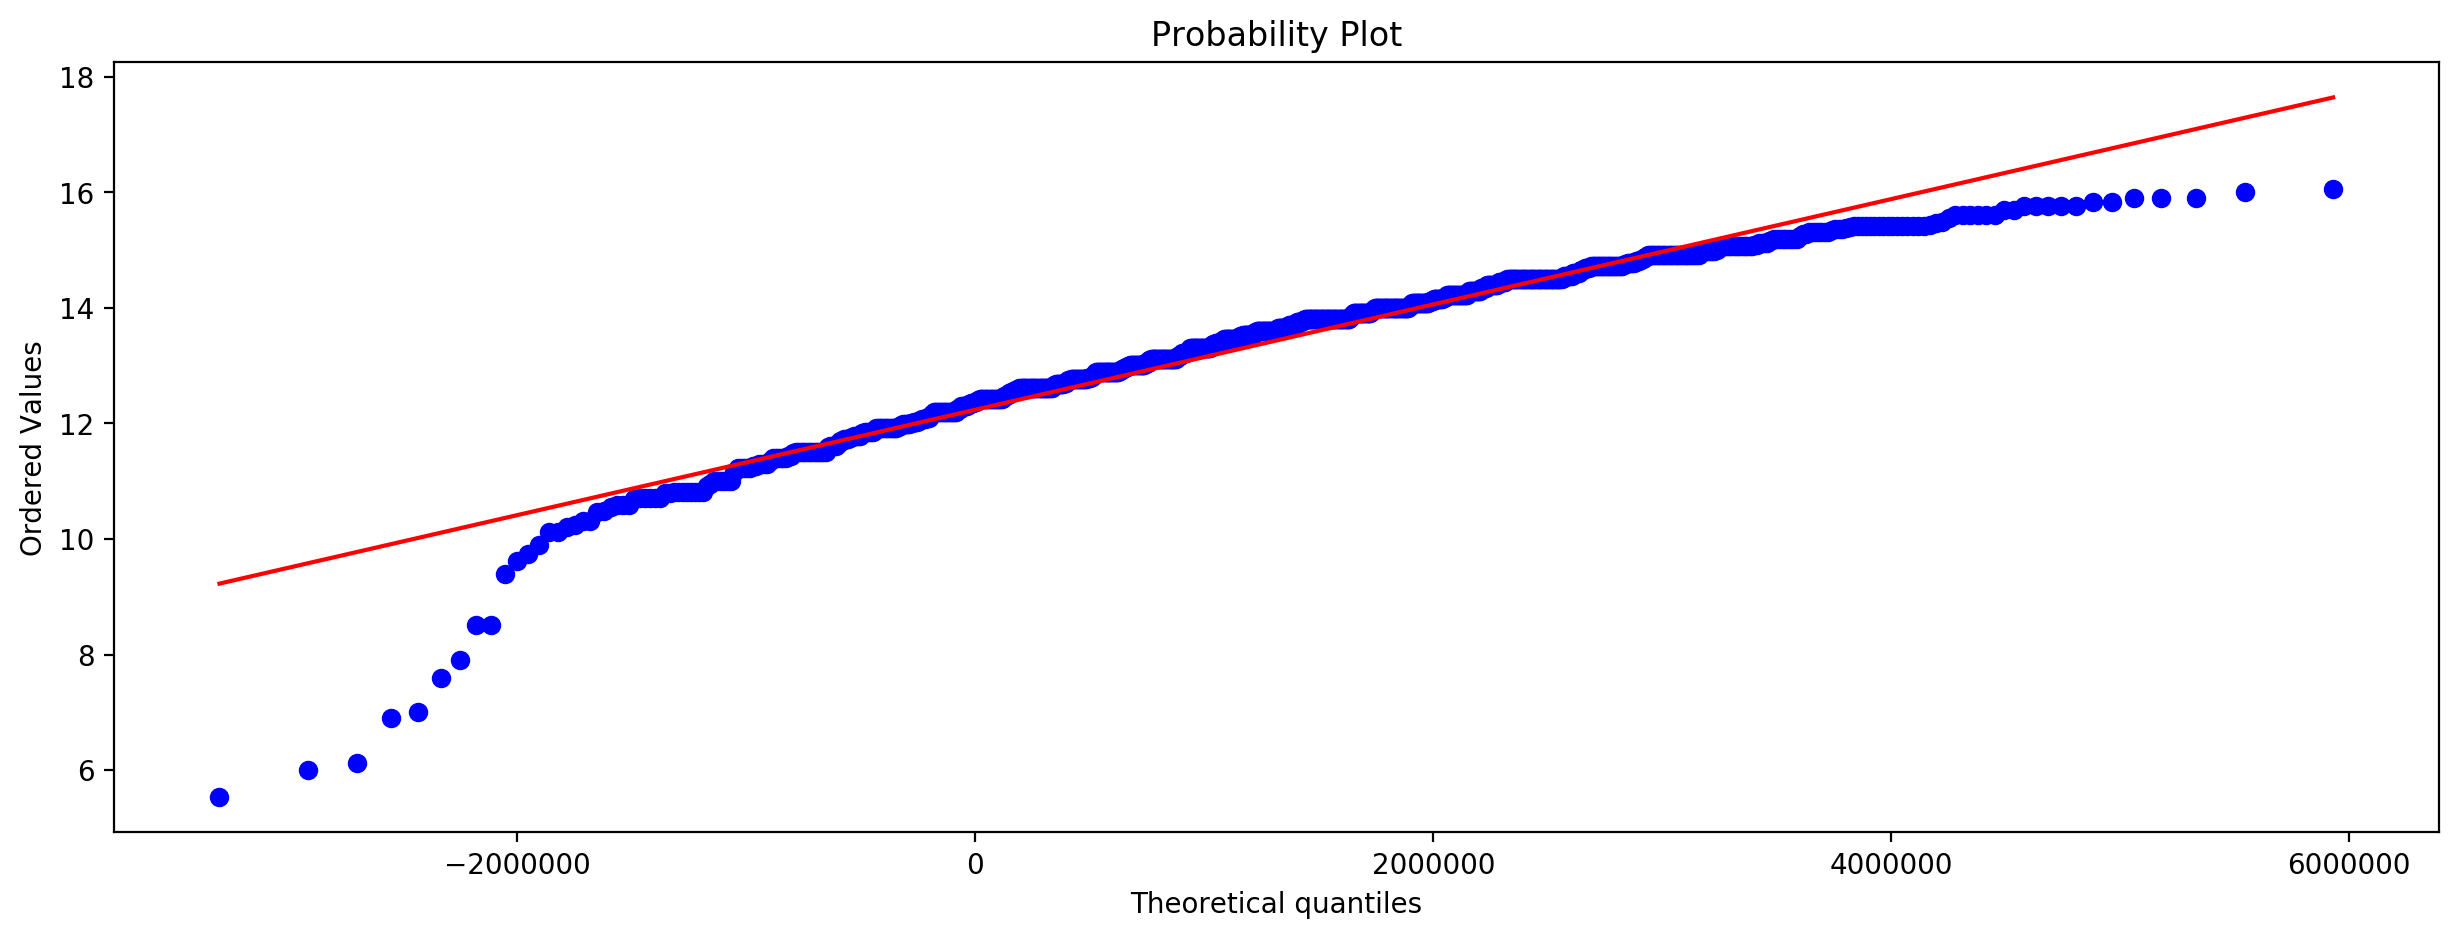

In [14]:
probplots = ProbPlots(data.BUDGET)
probplots.plot_probplot(dist_name='lognorm')

<module 'matplotlib.pyplot' from '/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

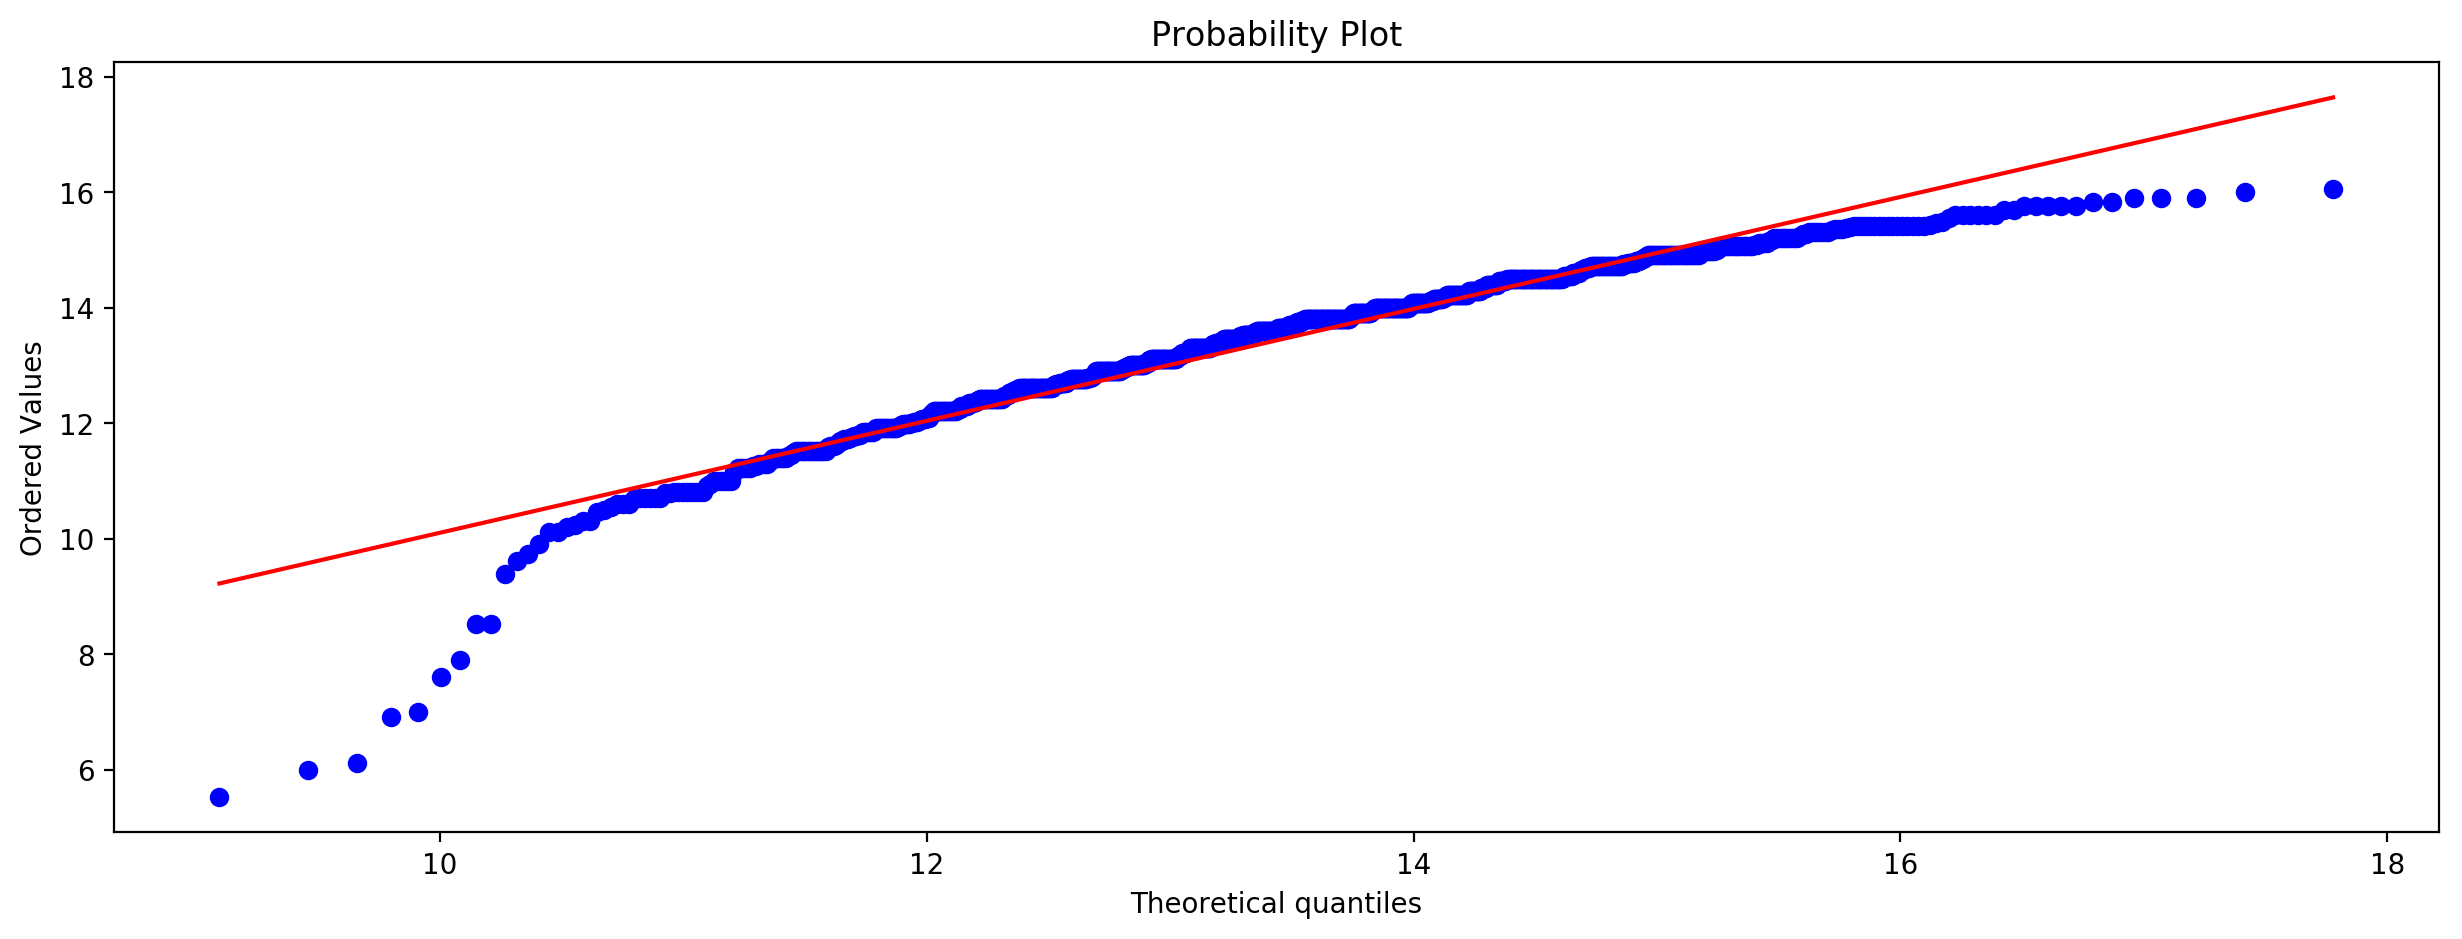

In [15]:
probplots = ProbPlots(np.log(data.BUDGET))
probplots.plot_probplot(dist_name='norm')

In [16]:
data.Total_Staff.describe()

count   975.000
mean     25.214
std      30.528
min       1.000
25%       7.000
50%      16.000
75%      32.000
max     280.000
Name: Total_Staff, dtype: float64

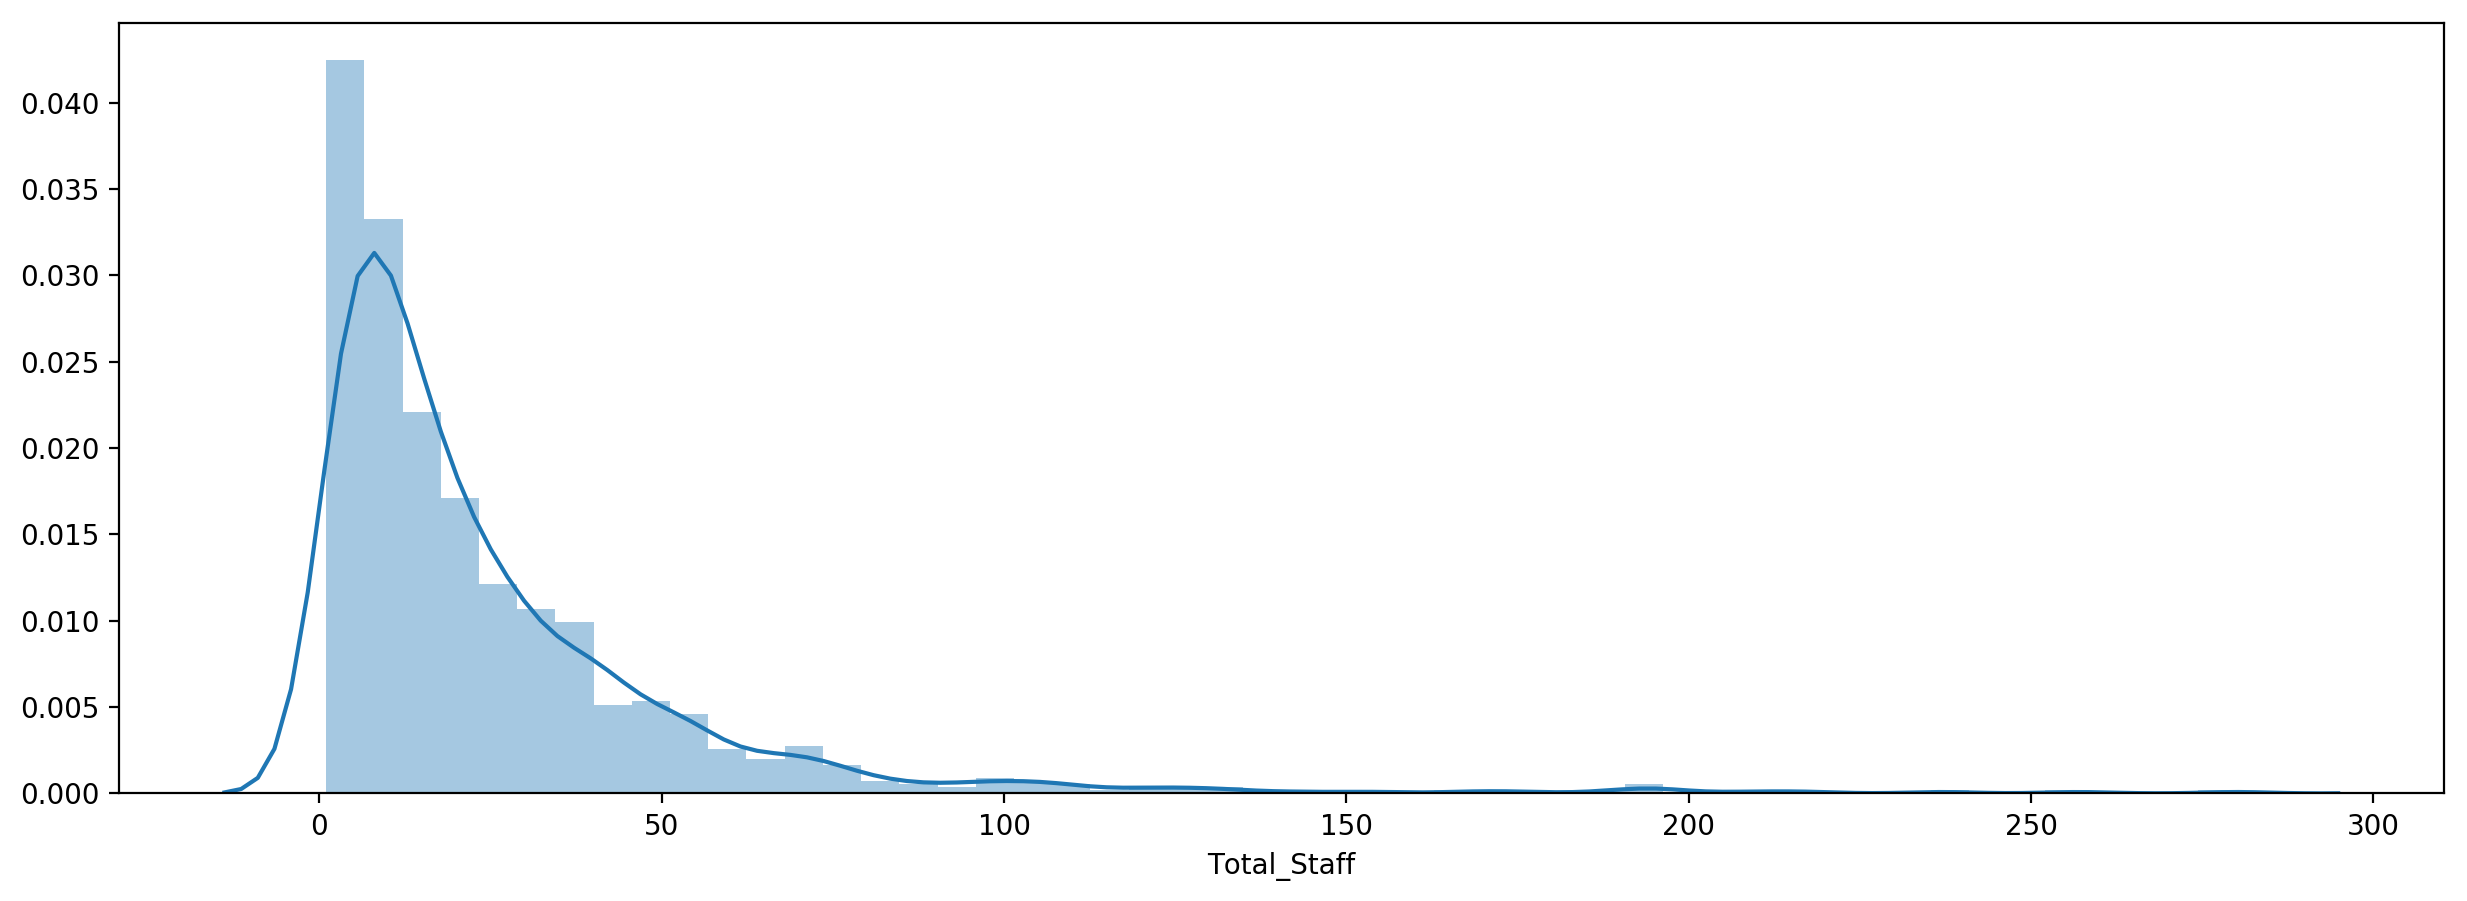

In [17]:
sns.distplot(data.Total_Staff)

<module 'matplotlib.pyplot' from '/Users/mdlynch37/anaconda3/envs/py3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

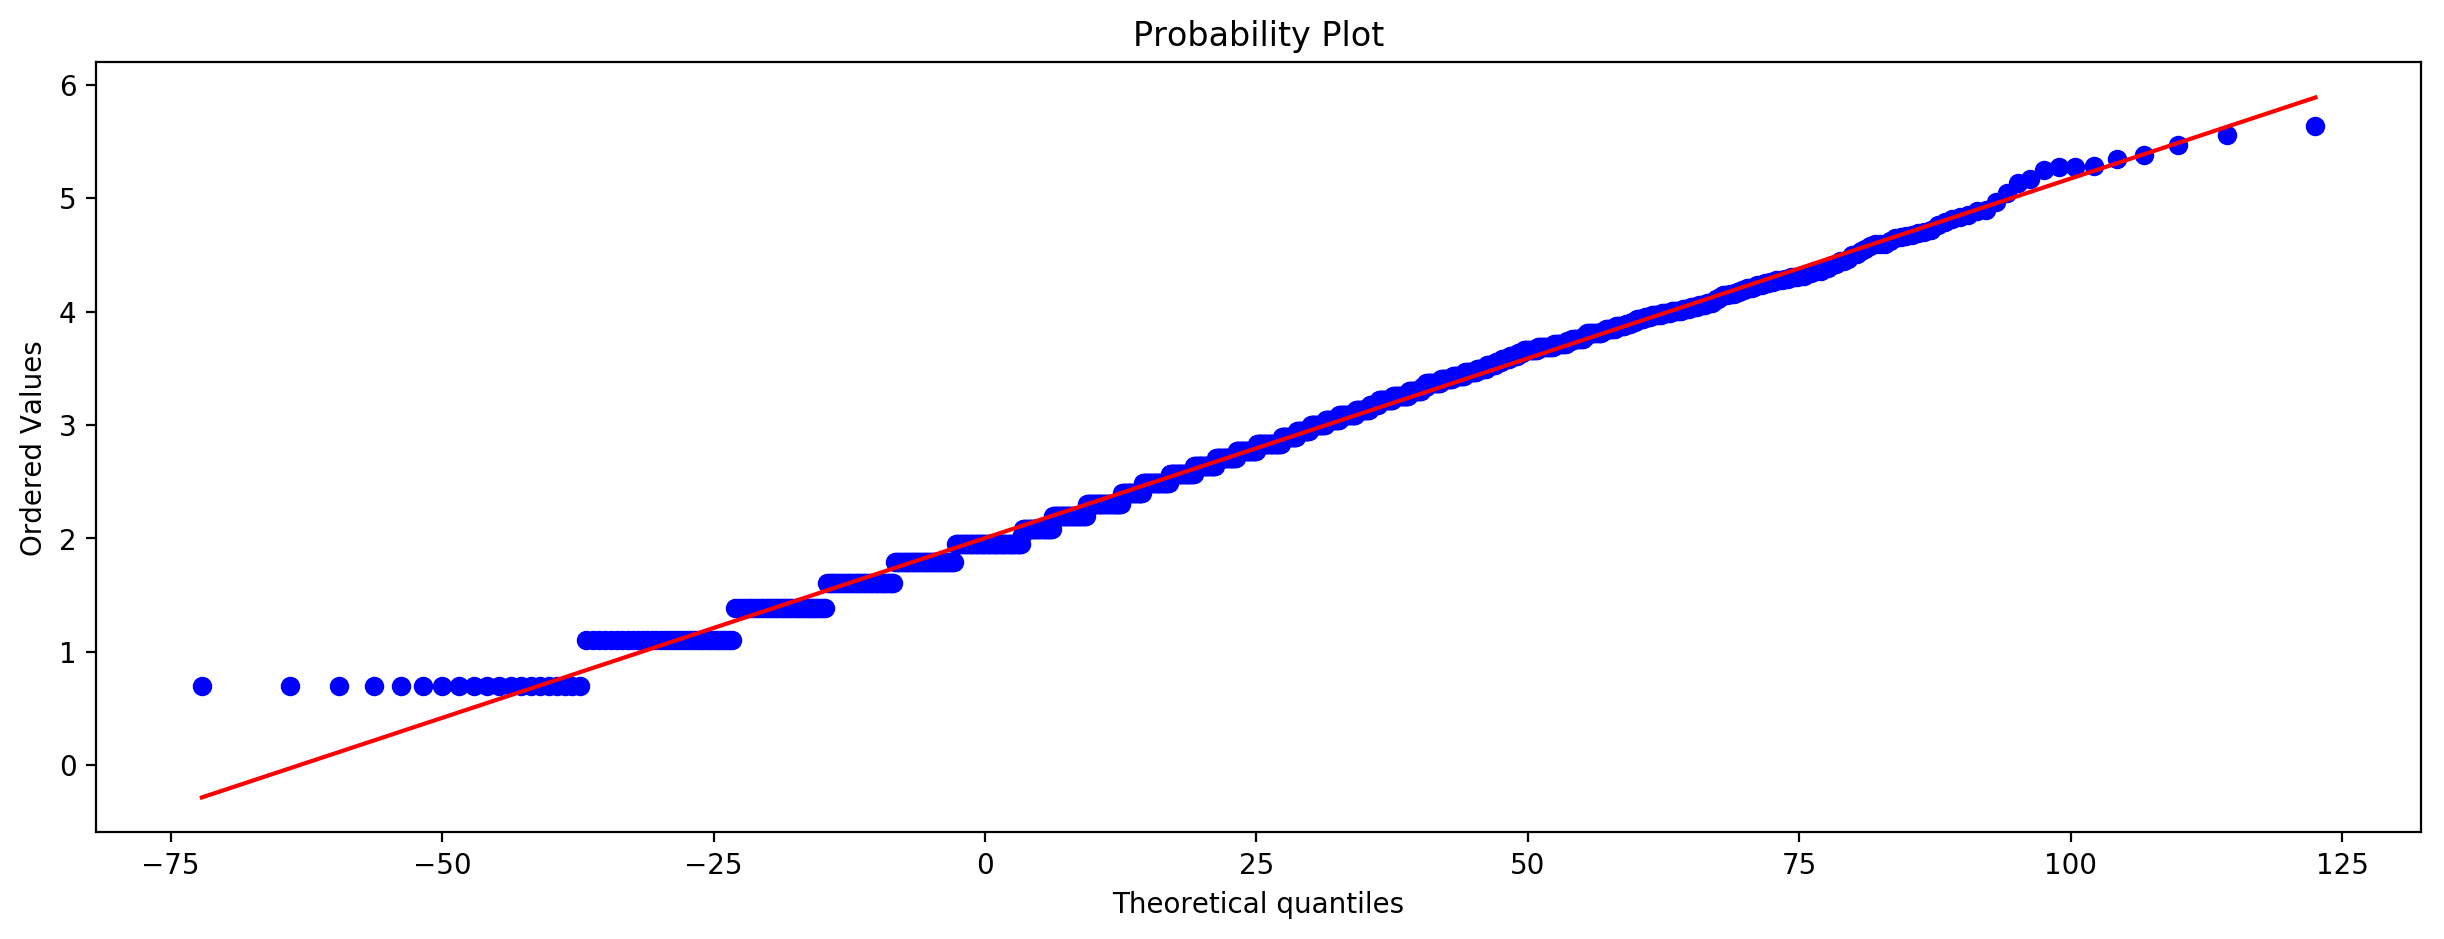

In [18]:
probplots = ProbPlots(data.Total_Staff)
probplots.plot_probplot(dist_name='lognorm')

In [19]:
np.corrcoef(data.BUDGET, data.Total_Staff)

array([[ 1.        ,  0.79340288],
       [ 0.79340288,  1.        ]])

In [20]:
np.corrcoef(data.BUDGET.rank(), data.Total_Staff.rank())

array([[ 1.        ,  0.80493962],
       [ 0.80493962,  1.        ]])

In [21]:
data.Total_Staff.describe()

count   975.000
mean     25.214
std      30.528
min       1.000
25%       7.000
50%      16.000
75%      32.000
max     280.000
Name: Total_Staff, dtype: float64

0.793402877096 0.80493961588 0.730291177404


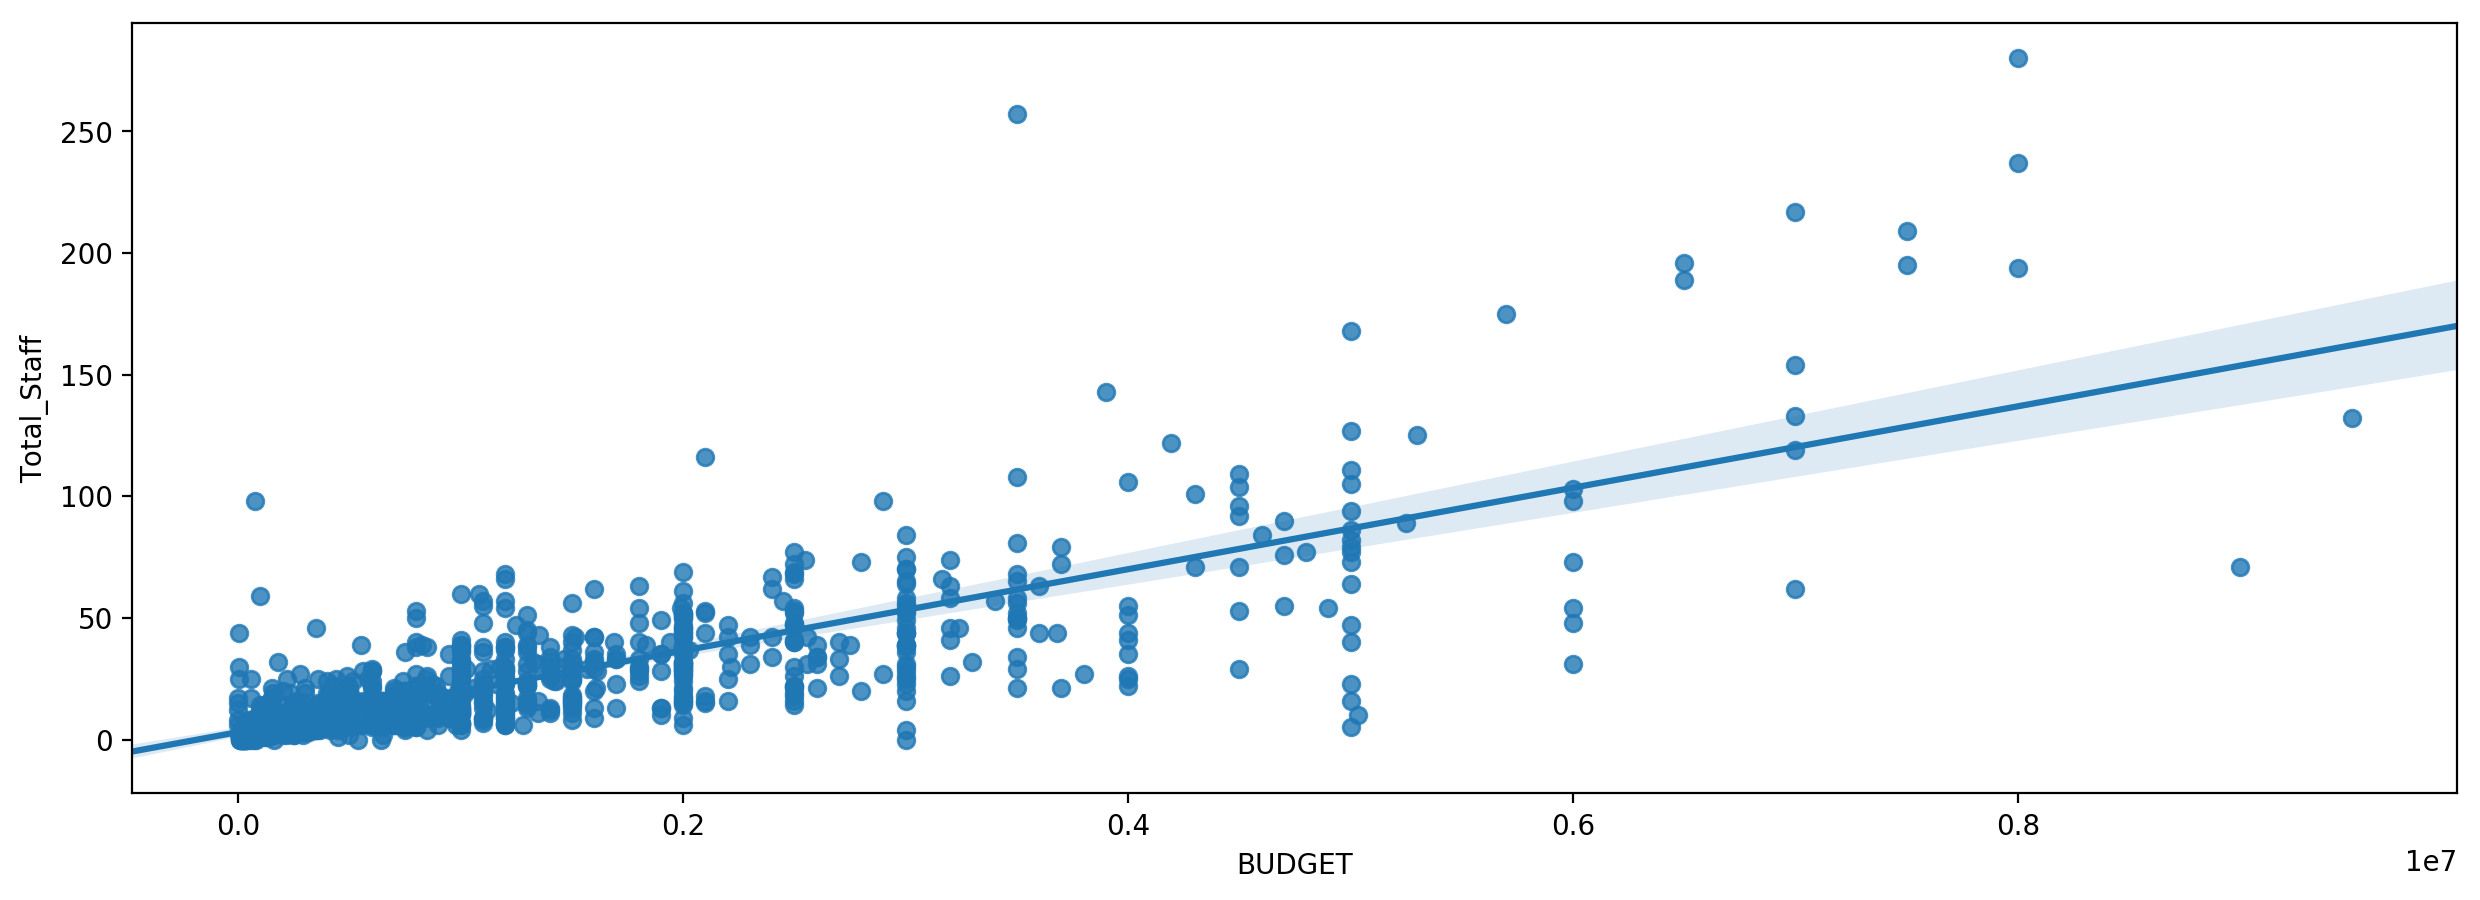

In [22]:
print(data.BUDGET.corr(data.Total_Staff), 
      data.BUDGET.corr(data.Total_Staff, method='spearman'),
      np.log(data.BUDGET).corr(np.log(data.Total_Staff)))  # log transformation
sns.regplot(x=fact_df.BUDGET, y=fact_df.Total_Staff)
plt.show()

In [23]:
race_cols = ['natams', 'asians', 'pacifici', 'blacks', 'hispanic', 'white', 'multi']
age_groups = ['seniors', 'middleag', 'medadult', 'yadults', 'kidyth', 'females']
leaders_time = ['doevan', 'dotrain', 'doteach', 'dosmall', 'doadmin']

cols = ['list', 'sschool', 'yadult', 'youthact', 
        'TUTOR_No', 'TUTOR_Y1', 'TUTOR_Y2', 
        'parents', 'TECH1', 'family', 'diverse', 'members',
        'natams', 'asians', 'pacifici', 'blacks', 'hispanic', 'white', 'multi',
        'seniors', 'middleag', 'medadult', 'yadults', 'kidyth', 'females',
        'college', 'newmemb', 'lifelong', 'nearby', 
        'leadtype', 'leadage', 'leadsex', 'yearcall', 
        'doevan', 'dotrain', 'doteach', 'dosmall', 'doadmin',
        'workyads', 'spegroup', 'yearsmet', 'monthmet',
        'fulledu', 'partedu', 'fullsec',
        'JOINT_No', 'JOINT_Y1', 'JOINT_Y2', 'budget']

important = ['list', 'sschool', 'TUTOR_N', 'TUTOR_Y1', 'TUTOR_Y2',
             'diverse', 'members', 'newmemb', 'doteach']

all_cols = cols + age_groups + leaders_time


In [24]:
display_cb(fact_cb.loc[[x.upper() for x in all_cols], :])

,DESCRIPTION
VAR,
LIST,List
SSCHOOL,Does your congregation have any of the following programs or activities? Religious school
YADULT,Does your congregation have any of the following programs or activities? Young adult activities or programs
YOUTHACT,Does your congregation have any of the following programs or activities? Youth [teen] activities or programs
TUTOR_NO,NaN
TUTOR_Y1,"During the past 12 months, did your congregation provide any of the following services for your own members or for people in the community? If yes, did you provide these services directly or together with another congregation or group? Tutoring or literacy programs: Provided directly"
TUTOR_Y2,"During the past 12 months, did your congregation provide any of the following services for your own members or for people in the community? If yes, did you provide these services directly or together with another congregation or group? Tutoring or literacy programs: Together with another group"
PARENTS,How much does your congregation emphasize the following personal and family religious practices? Emphasize parents talking with their children about being Jewish
TECH1,Other technology mentioned


In [25]:
fact_df = fact_df[important]
display(fact_df.shape)
fact_df.head()

KeyError: "['list' 'sschool' 'diverse' 'members' 'newmemb' 'doteach'] not in index"